In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-habits-and-academic-performance-dataset/enhanced_student_habits_performance_dataset/enhanced_student_habits_performance_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/student-habits-and-academic-performance-dataset/enhanced_student_habits_performance_dataset/enhanced_student_habits_performance_dataset.csv")

In [3]:
df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


---

# Missing Data Check

In [4]:
missing_values=df.isnull().sum()

missing_values=missing_values[missing_values>0]
if missing_values.empty:
    print("There are no missing values in any of the columns")
else:
    print("Columns with missing values:\n",missing_values)

There are no missing values in any of the columns


> All columns in the dataset were checked, and no missing values were found.

---

# Data Type Check

In [5]:
print("Data Type:\n ",df.dtypes)

Data Type:
  student_id                         int64
age                                int64
gender                            object
major                             object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating             float64
extracurricular_participation     object
previous_gpa                     float64
semester                           int64
stress_level                     float64
dropout_risk                      object
social_activity                    int64
screen_time                      float64
study_environment                 object
access_to_tutoring                object
fam

In [6]:
numeric_cols=df.select_dtypes(include=["int64","float64"]).columns.tolist()
categoric_cols=df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric Cols \n",numeric_cols,"\n\n","Categoric Cols \n",categoric_cols)

Numeric Cols 
 ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score'] 

 Categoric Cols 
 ['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'dropout_risk', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']


In [7]:
#one-hot encoding
df_encoded=pd.get_dummies(df,columns=categoric_cols,drop_first=True)

In [8]:
df_encoded.shape

(80000, 47)

In [9]:
bool_cols=df_encoded.select_dtypes(include="bool").columns
df_encoded[bool_cols]=df_encoded[bool_cols].astype(int)

df_encoded.head()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,...,study_environment_Co-Learning Group,study_environment_Dorm,study_environment_Library,study_environment_Quiet Room,access_to_tutoring_Yes,family_income_range_Low,family_income_range_Medium,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,100000,26,7.645367,3.0,0.1,70.3,6.2,3,6.0,4.00,...,1,0,0,0,1,0,0,0,1,0
1,100001,28,5.700000,0.5,0.4,88.4,7.2,4,6.8,4.00,...,1,0,0,0,1,1,0,0,1,0
2,100002,17,2.400000,4.2,0.7,82.1,9.2,4,5.7,3.79,...,0,0,1,0,1,0,0,1,0,0
3,100003,27,3.400000,4.6,2.3,79.3,4.2,3,8.5,4.00,...,1,0,0,0,1,1,0,0,1,0
4,100004,25,4.700000,0.8,2.7,62.9,6.5,6,9.2,4.00,...,0,0,0,1,1,0,1,0,1,0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

df_encoded[numeric_cols]=scaler.fit_transform(df_encoded[numeric_cols])
df_encoded.head()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,...,study_environment_Co-Learning Group,study_environment_Dorm,study_environment_Library,study_environment_Quiet Room,access_to_tutoring_Yes,family_income_range_Low,family_income_range_Medium,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,-1.732029,1.066790,1.731919,0.344972,-1.641677,0.019161,-0.557064,-0.225430,-0.418464,0.858879,...,1,0,0,0,1,0,0,0,1,0
1,-1.731986,1.600758,0.761237,-1.384614,-1.382158,1.063417,0.124429,0.210953,-0.002138,0.858879,...,1,0,0,0,1,1,0,0,1,0
2,-1.731943,-1.336063,-0.885369,1.175173,-1.122639,0.699947,1.487414,0.210953,-0.574587,0.405191,...,0,0,1,0,1,0,0,1,0,0
3,-1.731899,1.333774,-0.386398,1.451907,0.261462,0.538405,-1.920049,-0.225430,0.882557,0.858879,...,1,0,0,0,1,1,0,0,1,0
4,-1.731856,0.799807,0.262265,-1.177064,0.607487,-0.407773,-0.352616,1.083721,1.246843,0.858879,...,0,0,0,1,1,0,1,0,1,0


* We converted categorical variables using One-Hot Encoding. This created a separate column for each category, allowing the model to treat categories without assuming any order between them.

* We standardized the numeric variables using StandardScaler, which transformed these features to have a mean of 0 and a standard deviation of 1. This helps models learn better.

------

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   student_id                             80000 non-null  float64
 1   age                                    80000 non-null  float64
 2   study_hours_per_day                    80000 non-null  float64
 3   social_media_hours                     80000 non-null  float64
 4   netflix_hours                          80000 non-null  float64
 5   attendance_percentage                  80000 non-null  float64
 6   sleep_hours                            80000 non-null  float64
 7   exercise_frequency                     80000 non-null  float64
 8   mental_health_rating                   80000 non-null  float64
 9   previous_gpa                           80000 non-null  float64
 10  semester                               80000 non-null  float64
 11  st

---

# Data Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


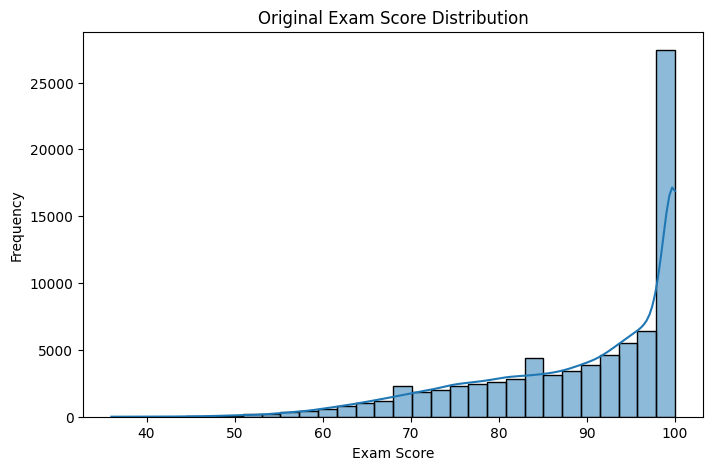

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['exam_score'], bins=30, kde=True)
plt.title('Original Exam Score Distribution')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

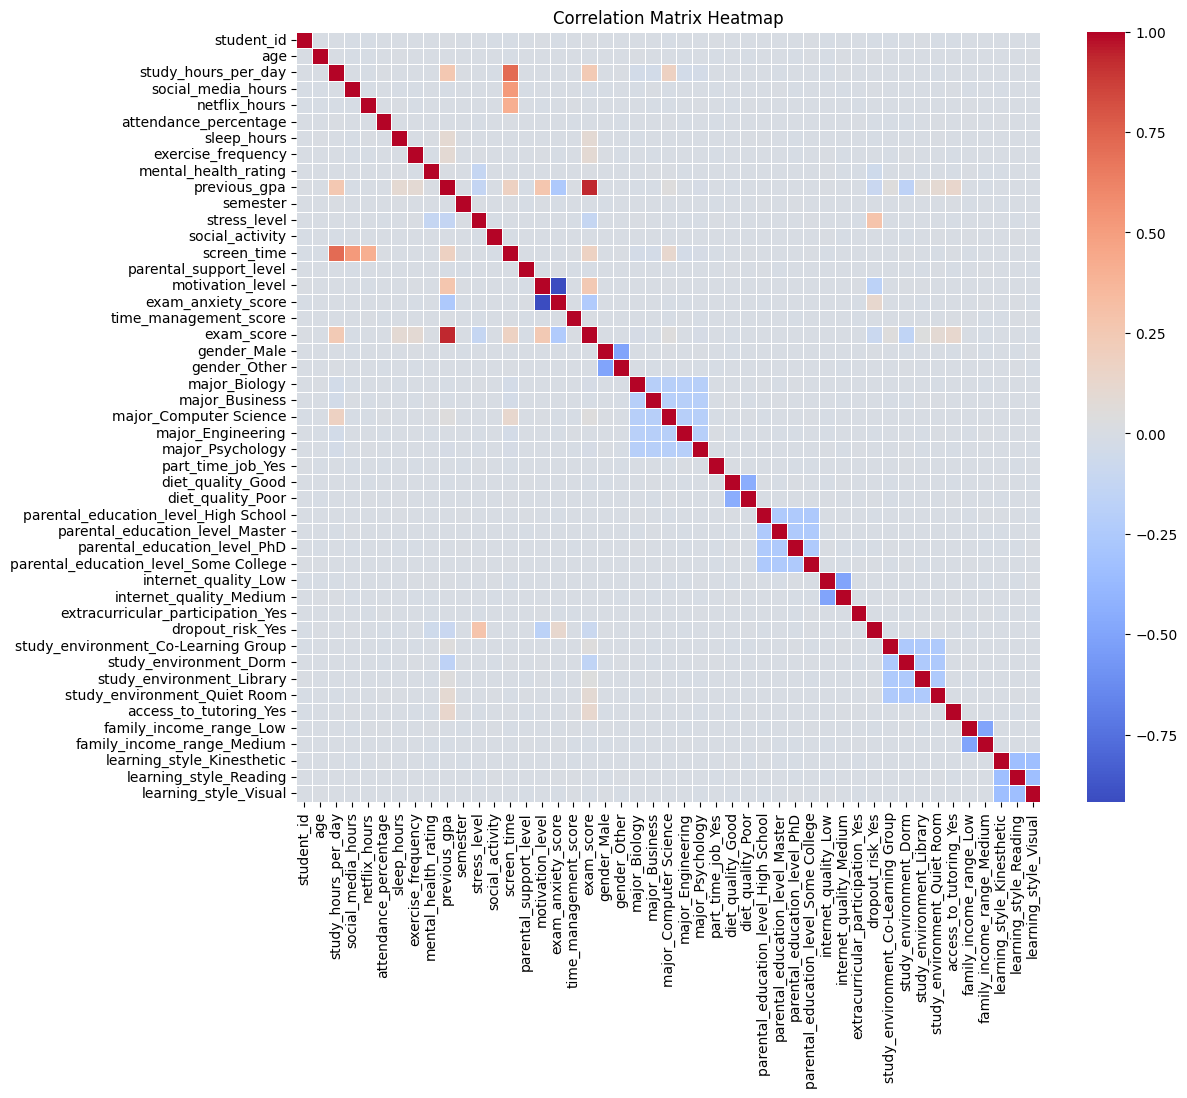

In [15]:
plt.figure(figsize=(12,10))
corr=df_encoded.corr()
sns.heatmap(corr,cmap="coolwarm",fmt='.2f',linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

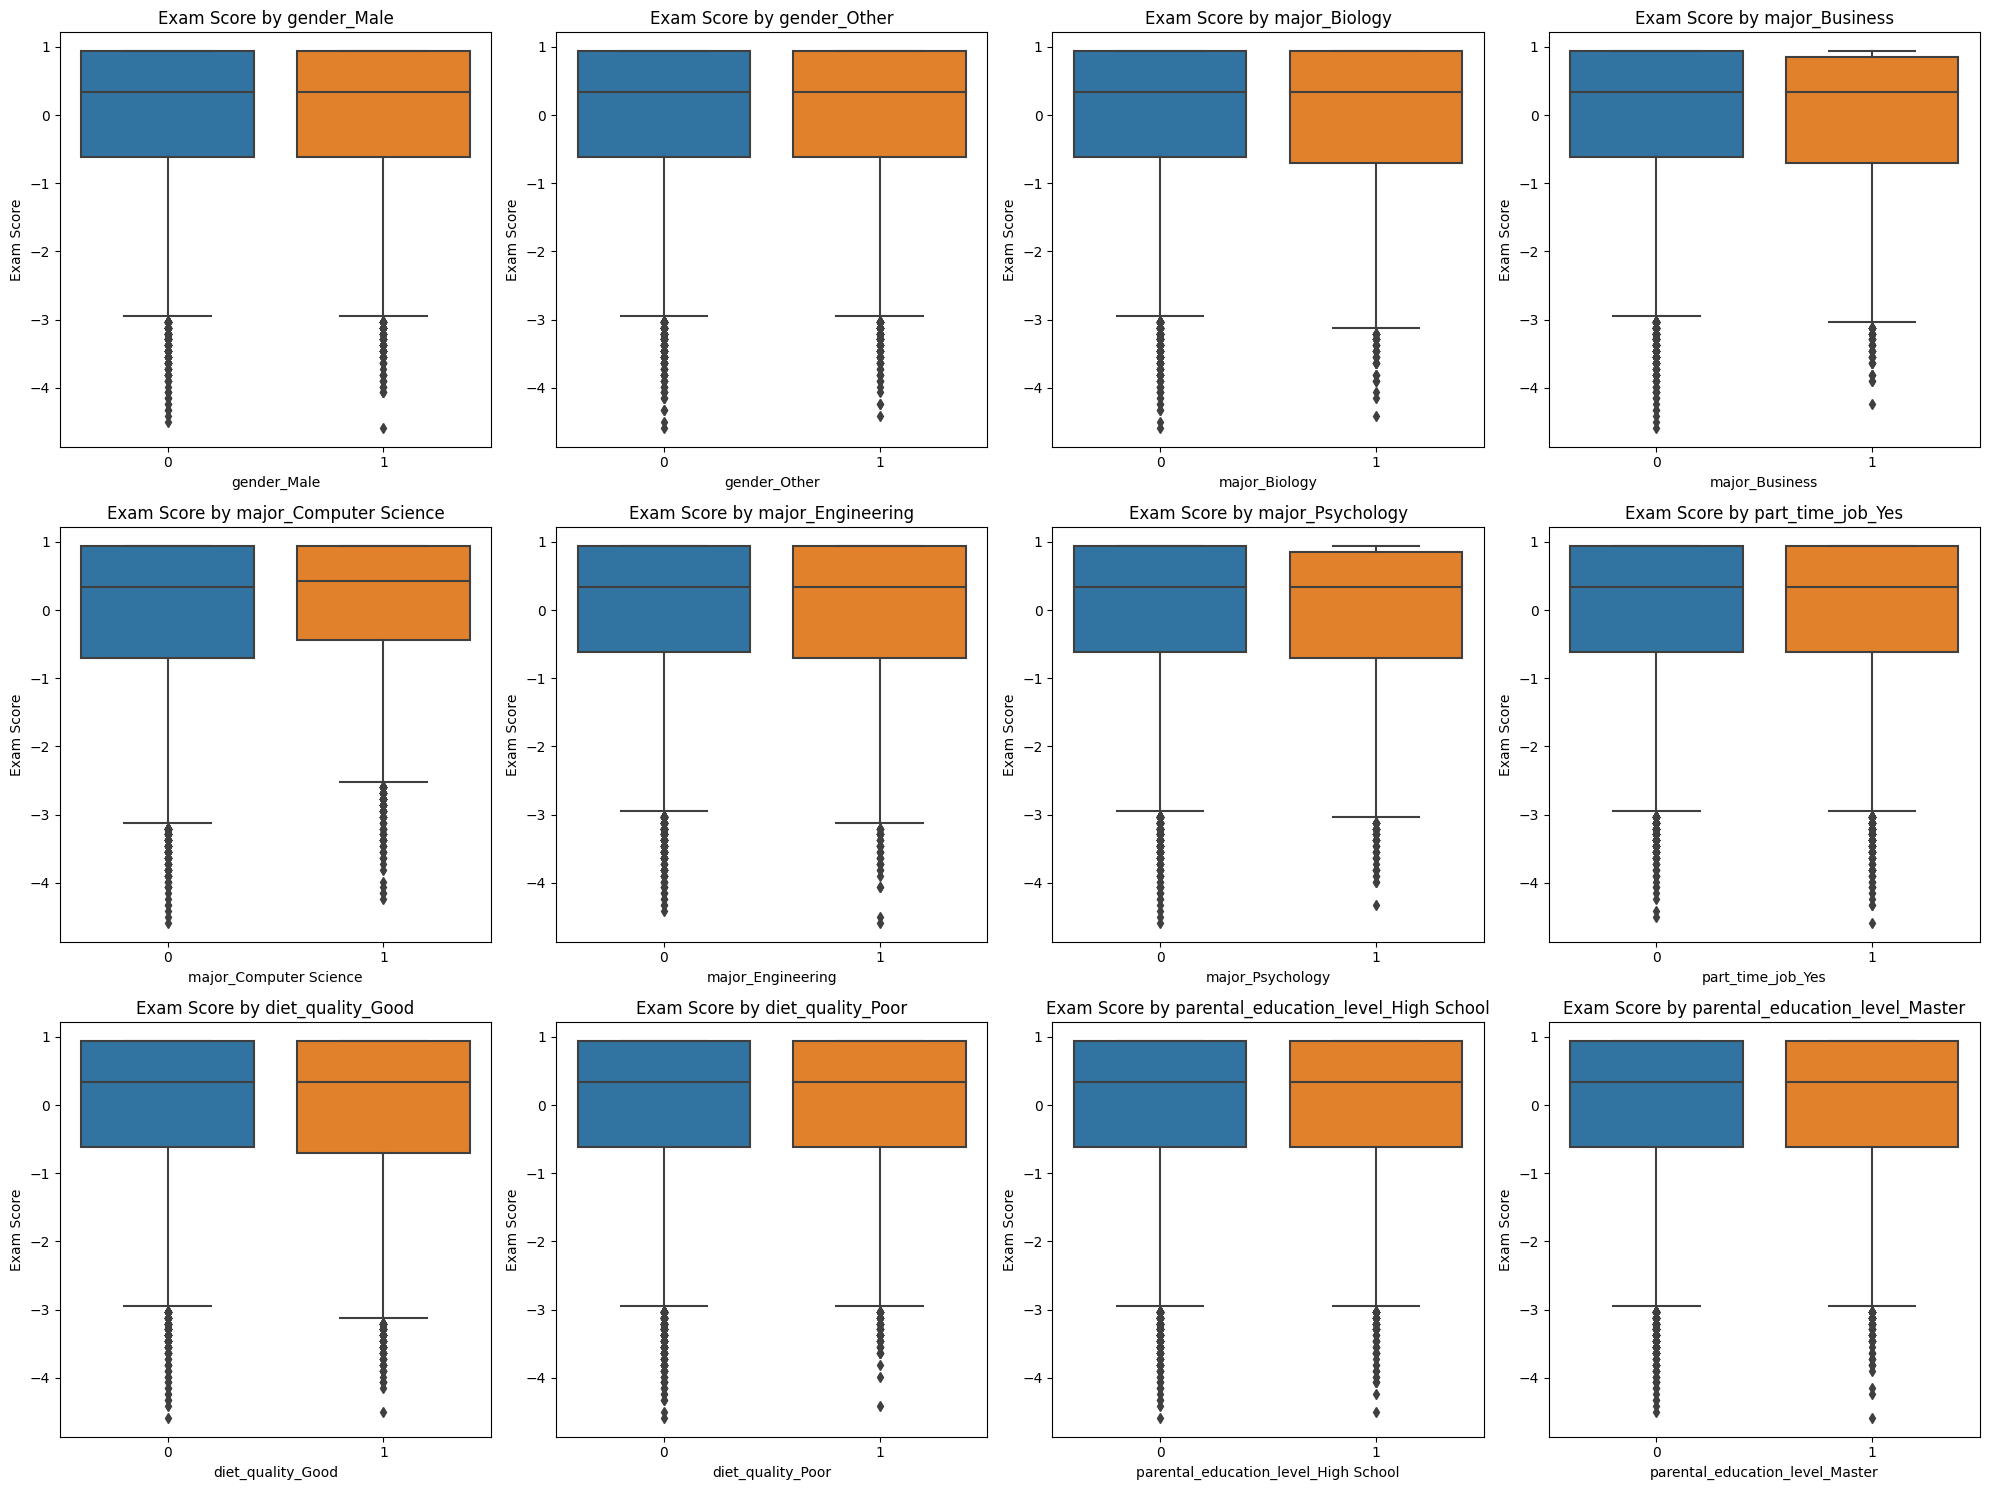

In [16]:
categoric_encoded_cols = [col for col in df_encoded.columns if df_encoded[col].nunique() == 2 and col != 'exam_score']

fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax=ax.flatten()

for i, col in enumerate(categoric_encoded_cols[:12]):  
    sns.boxplot(x=col, y='exam_score', data=df_encoded, ax=ax[i])
    ax[i].set_title(f'Exam Score by {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()


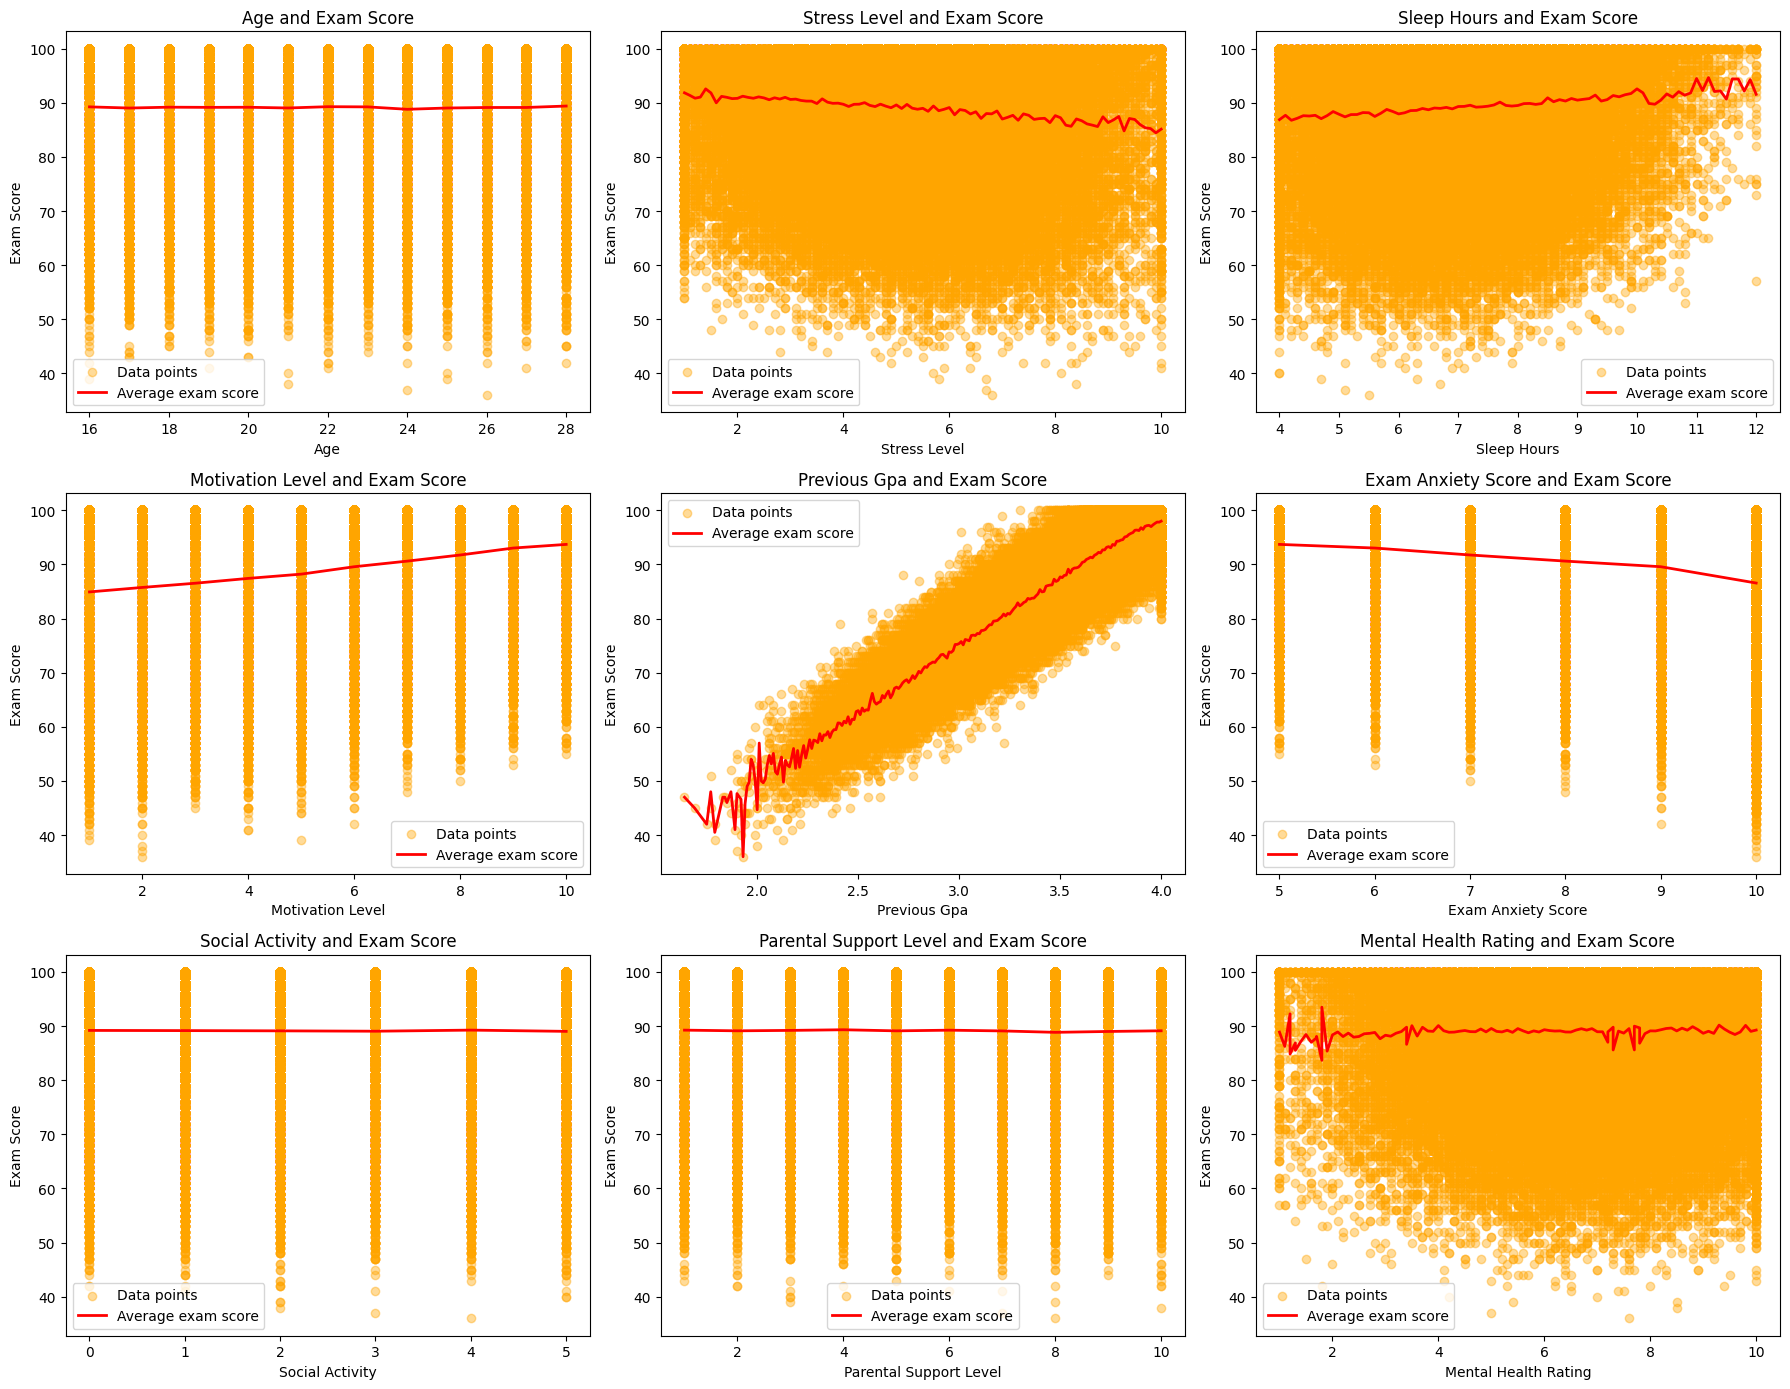

In [17]:
scatter_cols = ["age", "stress_level", "sleep_hours", "motivation_level", "previous_gpa", "exam_anxiety_score","social_activity","parental_support_level","mental_health_rating"]

fig, axs = plt.subplots(3, 3, figsize=(18, 14))  
axs = axs.flatten()  

for idx, col in enumerate(scatter_cols):
    ax = axs[idx]
    
   
    ax.scatter(df[col], df["exam_score"], color="orange", alpha=0.4, label="Data points")
    
    
    mean = df.groupby(col)["exam_score"].mean()
    ax.plot(mean.index, mean.values, color="red", linewidth=2, label="Average exam score")
    
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel("Exam Score")
    ax.set_title(f"{col.replace('_', ' ').title()} and Exam Score")
    ax.legend()

plt.tight_layout()
plt.show()


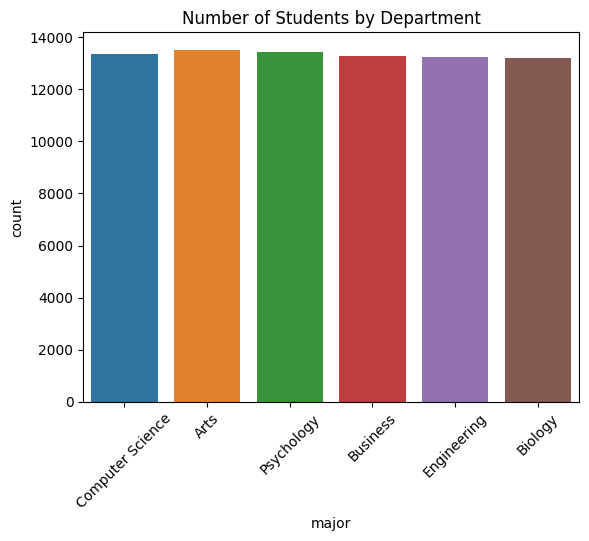

In [18]:
sns.countplot(x="major", data=df)
plt.title("Number of Students by Department")
plt.xticks(rotation=45)
plt.show()

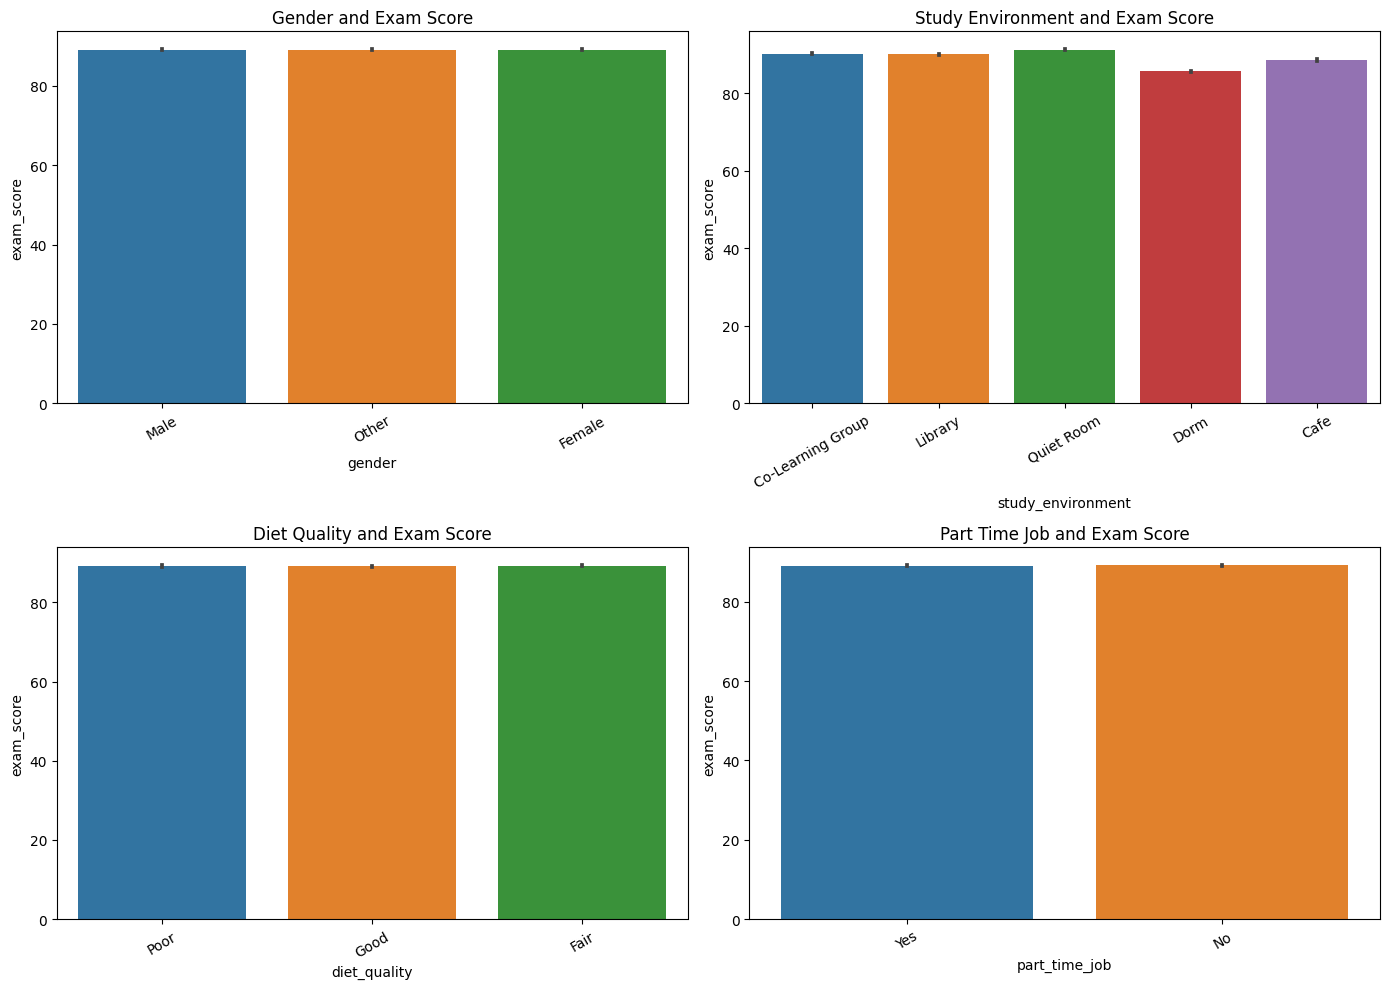

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

categoric_cols = ['gender', 'study_environment', 'diet_quality', 'part_time_job']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.flatten()  

for idx, col in enumerate(categoric_cols):
    sns.barplot(x=col, y="exam_score", data=df, ax=axes[idx])
    axes[idx].set_title(f"{col.replace('_',' ').title()} and Exam Score")
    axes[idx].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


---

# Model Training and Evaluation: Predicting Exam Scores

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_encoded.drop("exam_score", axis=1)
y = df_encoded["exam_score"]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [24]:
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.1306120993320088
R2 Score: 0.8703789351001365
Mean Absolute Error: 0.2757882387473681


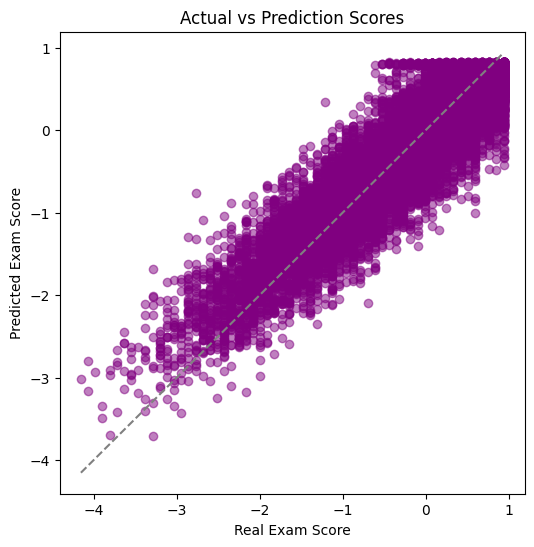

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="gray")
plt.xlabel("Real Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Prediction Scores")
plt.show()

* The linear regression model predicts exam scores well, explaining 87% of the variance with low error rates. It is a strong and reliable model.